# QF 600 Asset Pricing | YU Lingfeng
## `Homework 5` | Stochastic Discount Factor

### <font color = green> Activation of necessary libraries. </font>

In [1]:
# !pip install matplotlib
# !pip install --upgrade openpyxl
# !pip install nbconvert

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime

from IPython.display import display
from IPython.display import Image
import random
import warnings

# Ignore all warnings (not recommended for production code)
warnings.filterwarnings("ignore")

In [3]:
num_samples = 10000

In [4]:
np.log(0.65)

-0.4307829160924542

In [5]:
data = np.random.normal(0, 1, num_samples)
v_uni = np.random.random(num_samples)
v_dis = np.where(v_uni > 0.017, 0, np.log(0.65))

(array([ 157.,    0.,    0.,    0., 9843.]),
 array([-0.43078292, -0.34462633, -0.25846975, -0.17231317, -0.08615658,
         0.        ]),
 <BarContainer object of 5 artists>)

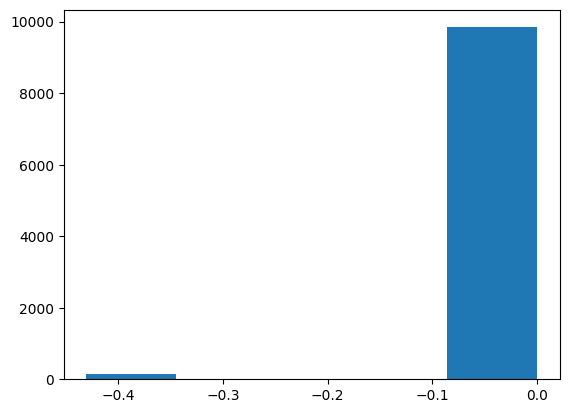

In [6]:
plt.hist(v_dis, bins=5)

In [7]:
## ln~𝑔 = 0.02 + 0.02~𝜖 + ~𝜈
## Stochastic Discount Factor
def cal_vol_ratio(num_samples, r_range, m, s, pi, phi,\
                  delta=0.99, m_c=0, s_c=1):
    result = []
   
    e_norm = np.random.normal(m_c, s_c, num_samples)
    v_uni = np.random.random(num_samples)
    v_dis = np.where(v_uni > pi, 0, np.log(phi))
    
    # ln~𝑔 = 0.02 + 0.02~𝜖 + ~𝜈    
    ln_g = m + s * e_norm + v_dis
    for r_value in r_range:
        M = delta * np.power(np.exp(ln_g), -r_value)

        std_M = np.std(M)
        mu_M = np.mean(M)
        vol_ratio = std_M / mu_M
        
        result.append([r_value, vol_ratio, mu_M, std_M])
    result = pd.DataFrame(result, columns = ['γ', 'σM/μM', 'μM', 'σM'])
    result.set_index('γ', inplace = True)
    return result

In [8]:
r = np.arange(1, 4.1, 0.1)
num_s = int(1e5)
vol_r = cal_vol_ratio(num_s, r, 0.02, 0.02, 0.017, 0.65, 0.99, 0, 1)
n = 0
while vol_r.iloc[-8, 0] < 0.4:
    n+=1
    vol_r = cal_vol_ratio(num_s, r, 0.02, 0.02, 0.017, 0.65, 0.99, 0, 1)
    if n == 100:
        break

In [9]:
n

26

In [10]:
vol_r.index = vol_r.index.round(4)
vol_r

,σM/μM,μM,σM
γ,,,
1.0,0.073304,0.979831,0.071825
1.1,0.082300,0.979076,0.080578
1.2,0.091651,0.978375,0.089669
1.3,0.101373,0.977730,0.099115
1.4,0.111479,0.977144,0.108931
1.5,0.121987,0.976618,0.119134
1.6,0.132911,0.976155,0.129742
1.7,0.144269,0.975757,0.140771
1.8,0.156077,0.975426,0.152241


In [11]:
def plot_vol_ratio(df_vol_r, num_samples):
    X = df_vol_r.index
    Y = df_vol_r['σM/μM']
    # Create a scatter plot with lines
    plt.plot(X, Y, color='blue', marker='o', label='Data Points', linestyle='-')
    plt.axhline(0.4, color='red', linestyle='--', label='Horizontal Line at y=0.4')
    plt.axvline(3.3, color='red', linestyle='--', label='Horizontal Line at y=0.4')
    # Add labels and a title
    plt.xlabel('γ values')
    plt.ylabel('σM/μM')
    plt.title('Volitality Ratio Simulation')
    # Set the tick locations and labels for the x-axis
    plt.xticks(X, rotation=90)
    # Add a legend
    plt.legend(labels=[f'{int(num_samples):.1e} random draws'])

    # Save the figure as a PNG file
    plt.savefig('Volitality Ratio Simulation.png')

    plt.show()    
    return

> ### Question 1: Volitality Ratio Simulation

#### Q1.1 plot σM/μM (on the vertical axis) vs γ (on the horizontal axis).

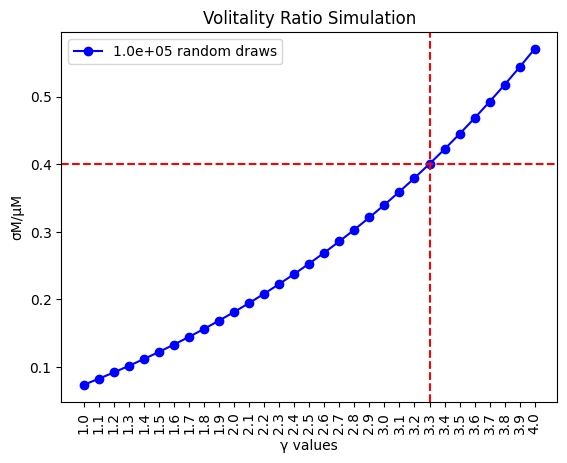

In [12]:
plot_vol_ratio(vol_r, num_s)

#### Q1.2 Find the smallest value of γ (in your data) for which σM/μM > 0.4.

In [13]:
(vol_r.loc[vol_r['σM/μM']>0.4].index[0])

3.3

#### Q1.3 economic significance of this result

## QF 600 Asset Pricing | `Homework 5` | YU Lingfeng
## Stochastic Discount Factor | Submission 2

> ### Question 1: Volitality Ratio Simulation

#### Q1.1 plot σM/μM (on the vertical axis) vs γ (on the horizontal axis).

In [17]:
vol_r

,σM/μM,μM,σM
γ,,,
1.0,0.073304,0.979831,0.071825
1.1,0.082300,0.979076,0.080578
1.2,0.091651,0.978375,0.089669
1.3,0.101373,0.977730,0.099115
1.4,0.111479,0.977144,0.108931
1.5,0.121987,0.976618,0.119134
1.6,0.132911,0.976155,0.129742
1.7,0.144269,0.975757,0.140771
1.8,0.156077,0.975426,0.152241


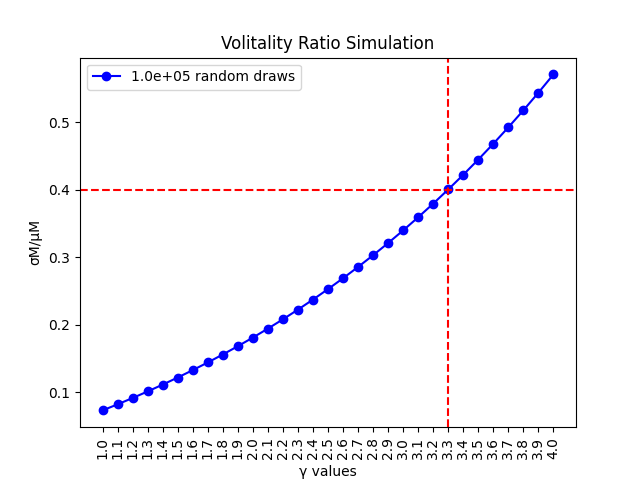

In [14]:
Image('Volitality Ratio Simulation.png')

#### Q1.2 Find the smallest value of γ (in your data) for which σM/μM > 0.4.

In [15]:
(vol_r.loc[vol_r['σM/μM']>0.4].index[0])

3.3

#### Q1.3 economic significance of this result

#### Ans:

#### 1. γ comes from the power Utility functions we choose. In power Utility, investors will have a Constant Relative Risk Aversion. Higer γ means higher degree of (relative) risk aversion. 
#### 2. σ_M/μ_M is the volitality ratio that measures the relative volitality of pricing kernel in a Consumption Capital Asset Pricing Model (CAPM). The pricing kernel in Consumption CAPM is a stochastic discount factor that reflects how investors discount future consumption. It essentially measures the relative preferences of investors for consumption today versus consumption in the future. It quantifies how much compensation investors require for bearing the uncertainty (volatility) associated with their preferences for future consumption. A higher volatility ratio implies that investors demand a higher risk premium to exchange consumption today for uncertain consumption in the future.
#### 3. The volitality ratio of pricing kerne shall have a lower bound of highest Sharpe ratio out of all possible portfolios. While the pricing kernel has lower limit of zero but no upper limit. This implies the pricing kernel heavily skewed to the right side.
#### 4. Based on historical US market data, the stock market has a Sharpe ratio of around 0.4, so volitality ratio of pricing kernel is at least 40%, which indicates high volitality on pricing kernel. A primary estimation on the γ value is more than 20, which is unreasonably high. The power utility functions becomes "L" shape.
#### 5. With the skewness character, we may reasonably guess the investor’s optimal consumption growth has lognormal distribution. After inserting in the Rare Disasters component, the γ is simulated to be 3.3-3.4 based on my simulation. And this becomes more reasonable in real life.